In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense

In [117]:
focus_columns = ['level_duration',
                 'ob_id_ramp', 'ob_id_lever', 'ob_id_spgbrd', 'ob_id_pendulum',
                 'ob_id_weight', 'ob_comp_freeform', 'ob_comp_pin',
                 'CompDiff', 'pre_total']

data = pd.read_csv("~/Downloads/updated_BIG_data_1.csv")[focus_columns].dropna() # Drop all NA values and select focus_columns

predictors = data.drop(columns=['level_duration'])
num_columns = predictors.shape[1] # for modeling building

response = np.log(data.level_duration).replace([np.inf, -np.inf], np.nan).fillna(0).round(0)
response.describe()


/Users/cfulsong/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    14909.000000
mean         4.094238
std          1.407858
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: level_duration, dtype: float64

In [118]:
num_columns = predictors.shape[1]
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')
print(f"The predicted variable, level_duration, is column index: {data.columns.get_loc('level_duration')}")

There are 14909 rows and 10 columns.
The predicted variable, level_duration, is column index: 0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)
num_columns = X_train.shape[1]

print("For X: Train:", X_train.shape,"Test: ", X_test.shape)
print("For Y: Train:", y_train.shape,"Test: ", y_test.shape)

For X: Train: (11927, 9) Test:  (2982, 9)
For Y: Train: (11927,) Test:  (2982,)


## Building and Fit the Model

In [120]:
model = Sequential()
model.add(Dense(12, input_dim=num_columns, activation='relu', name='input'))
model.add(Dense(6, activation='relu', name='hidden_6'))
model.add(Dense(3, activation='relu', name='hidden_3'))
model.add(Dense(1, activation='linear', name='exit'))


#Compile
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['accuracy'])
#Fit model
model.fit(X_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
11927/11927 [==============================] - 3s 269us/step - loss: 3.9224 - accuracy: 0.2408
Epoch 2/10
11927/11927 [==============================] - 2s 143us/step - loss: 1.6678 - accuracy: 0.3417
Epoch 3/10
11927/11927 [==============================] - 2s 142us/step - loss: 1.4268 - accuracy: 0.3822
Epoch 4/10
11927/11927 [==============================] - 2s 132us/step - loss: 1.3069 - accuracy: 0.4083
Epoch 5/10
11927/11927 [==============================] - 2s 141us/step - loss: 1.2270 - accuracy: 0.4211
Epoch 6/10
11927/11927 [==============================] - 2s 142us/step - loss: 1.1720 - accuracy: 0.4381
Epoch 7/10
11927/11927 [==============================] - 2s 153us/step - loss: 1.1375 - accuracy: 0.4491
Epoch 8/10
11927/11927 [==============================] - 2s 170us/step - loss: 1.1064 - accuracy: 0.4609
Epoch 9/10
11927/11927 [==============================] - 2s 190us/step - loss: 1.0902 - accuracy: 0.4634
Epoch 10/10
11927/11927 [=====================

In [121]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

Test loss: 1.1544533402307333
Test Accuracy: 0.4637826979160309


In [122]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 12)                120       
_________________________________________________________________
hidden_6 (Dense)             (None, 6)                 78        
_________________________________________________________________
hidden_3 (Dense)             (None, 3)                 21        
_________________________________________________________________
exit (Dense)                 (None, 1)                 4         
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________
None


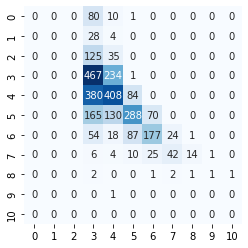

In [131]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

y_predicted = model.predict(X_test).round(0)
conf_mat = confusion_matrix(y_test, y_predicted)
heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, )
plt.savefig('conf_mat.png', dpi=300)